In [1]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf
import pathlib
import pandas as pd
import numpy as np
import plotly.express as px
import os
import io
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
# Import dataset with Pandas
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", encoding="ISO-8859-1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Displaying basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print("Number of columns : {}".format(dataset.shape[1]))
print()
print()

print("Display of dataset: ")
display(dataset.head())
print()
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])
print()
print()

print("Infos")
display(dataset.info())

Number of rows : 5572
Number of columns : 5


Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN




Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2




Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64



Infos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

In [4]:
dataset.iloc[:,[2,3,4]]=dataset.iloc[:,[2,3,4]].fillna("")

In [5]:
dataset = dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
dataset.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.describe()


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
!python -m spacy download en_core_web_md -q

2023-12-28 02:28:28.085423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 02:28:28.085489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 02:28:28.086789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 02:28:29.704887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import en_core_web_md
nlp = en_core_web_md.load()


In [9]:
# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [10]:
dataset["review_clean"] = dataset["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
dataset["review_clean"] = dataset["review_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
dataset["review_clean"] = dataset["review_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

dataset.head()

,v1,v2,review_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [11]:
mask = dataset.review_clean.apply(lambda x: type(x)==str)
mask.value_counts()

True    5572
Name: review_clean, dtype: int64

In [12]:
dataset['v1'] = dataset['v1'].apply(lambda x: 0 if x=='spam' else 1)

In [13]:
eda = dataset.groupby('v1').count().reset_index()
fig = px.pie(eda, values='v2',names='v1',title='Target Distribution (O if Spam, 1 if Ham)')
fig.show()


In [14]:
#créer un tokenizer pour convertir le texte en sequence d'entier  des 1000 mot les plus représenté
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.review_clean)
dataset["review_encoded"] = tokenizer.texts_to_sequences(dataset.review_clean)

In [15]:
dataset.head()

,v1,v2,review_clean,review_encoded
0,1,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 232, 447, 463, 940, 32, 50, 206, 941, 78, ..."
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[8, 195, 464, 290, 2, 1]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[10, 303, 3, 529, 658, 30, 1, 843, 424, 1, 1, ..."
3,1,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 149, 1, 2, 79]"
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[703, 20, 659, 130]"


In [16]:
#faire un padding pour que les sequence ont la meme longueur
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.review_encoded, padding="post")

In [17]:
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(reviews_pad,dataset.v1, test_size=0.3)

In [18]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [19]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [20]:
embedding_dim = 32
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding
                  tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_shape=[reviews_pad.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Couche de sortie
                  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 74, 32)            32032     
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32577 (127.25 KB)
Trainable params: 32577 (127.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_batch,
                    epochs=30,
                    validation_data=val_batch)

Epoch 1/30
61/61 [==============================] - 1s 7ms/step - loss: 0.5602 - accuracy: 0.8603 - val_loss: 0.4120 - val_accuracy: 0.8792
Epoch 2/30
61/61 [==============================] - 0s 5ms/step - loss: 0.3818 - accuracy: 0.8603 - val_loss: 0.3288 - val_accuracy: 0.8792
Epoch 3/30
61/61 [==============================] - 0s 6ms/step - loss: 0.3492 - accuracy: 0.8603 - val_loss: 0.3069 - val_accuracy: 0.8792
Epoch 4/30
61/61 [==============================] - 0s 7ms/step - loss: 0.3198 - accuracy: 0.8603 - val_loss: 0.2760 - val_accuracy: 0.8792
Epoch 5/30
61/61 [==============================] - 1s 9ms/step - loss: 0.2760 - accuracy: 0.8603 - val_loss: 0.2372 - val_accuracy: 0.8792
Epoch 6/30
61/61 [==============================] - 1s 8ms/step - loss: 0.2314 - accuracy: 0.8603 - val_loss: 0.2012 - val_accuracy: 0.8792
Epoch 7/30
61/61 [==============================] - 0s 8ms/step - loss: 0.1997 - accuracy: 0.8928 - val_loss: 0.1782 - val_accuracy: 0.9258
Epoch 8/30
61/61 [==

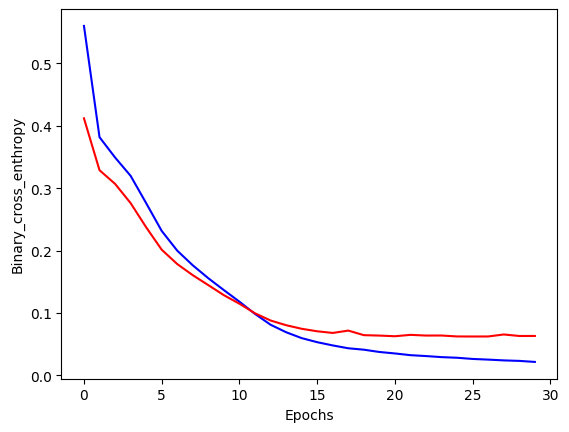

In [24]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("Binary_cross_enthropy")
plt.xlabel("Epochs")
plt.show()

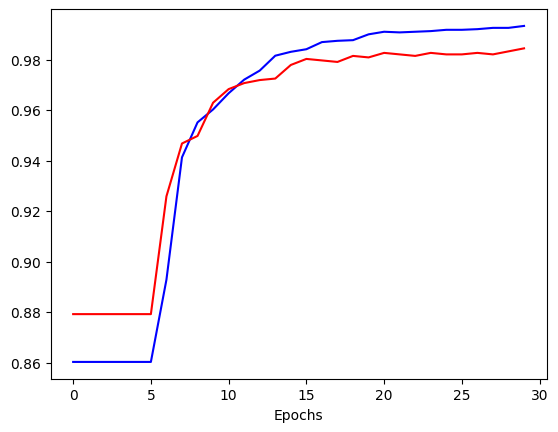

In [25]:
# Visualization of accuracy training
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("")
plt.xlabel("Epochs")
plt.show()

53/53 [==============================] - 0s 2ms/step


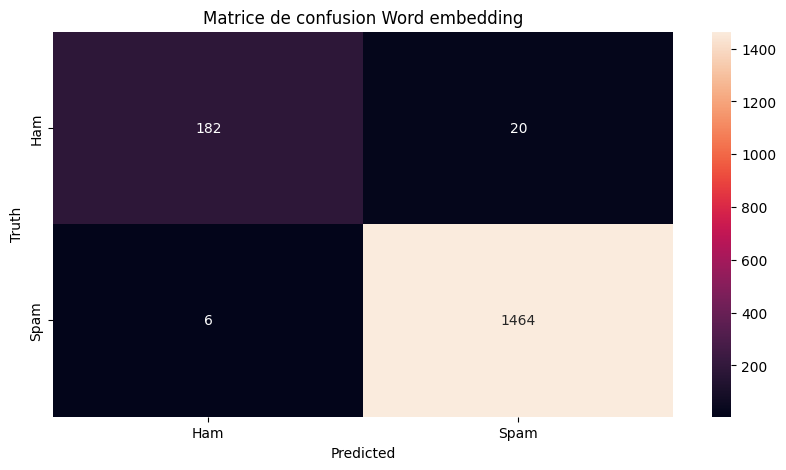

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predictions for validation set
predictions = model.predict(xval)

# get the label predicted
predicted_labels = np.where(predictions > 0.5, 1, 0) # round to 1 for values over 0.5, otherwise 0

#Matrix
cm = confusion_matrix(yval, predicted_labels)
cm

# visualisation
class_labels = ['Ham', 'Spam']
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matrice de confusion Word embedding')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()